# k-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

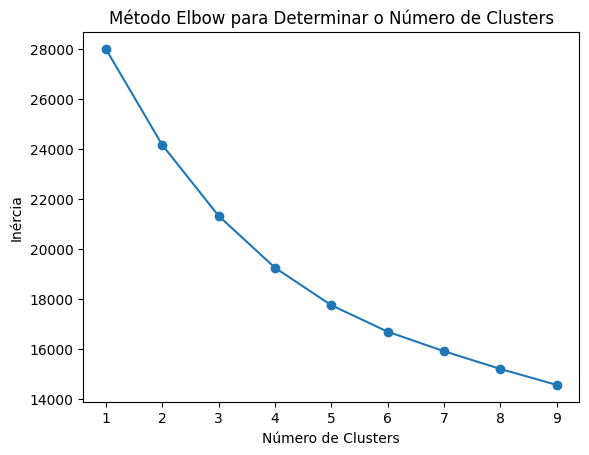

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregue o novo conjunto de dados
df = pd.read_csv('apple_quality.csv')

# Remova a última linha do DataFrame
df = df.drop(df.tail(1).index)

# Selecione as colunas relevantes para clustering
features = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]

# Preencha os valores ausentes, se necessário
features = features.fillna(0)

# Padronize os dados para evitar que recursos com grandes magnitudes dominem o clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine o número ideal de clusters usando o método Elbow
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plote o gráfico de Elbow
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

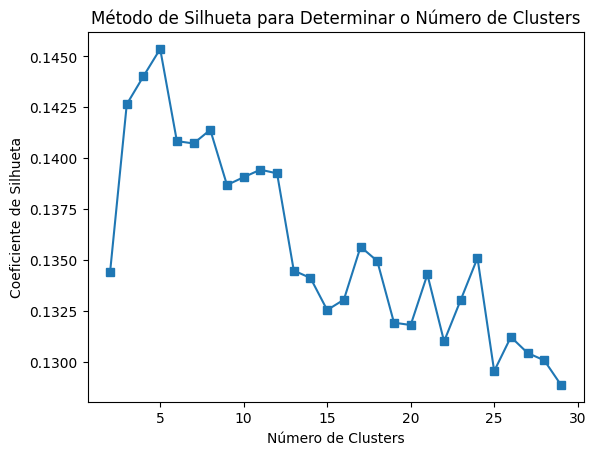

In [ ]:
from sklearn.metrics import silhouette_score

# Calcular o coeficiente de silhueta para diferentes números de clusters
silhouette_scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plotar o gráfico de Silhueta
plt.plot(range(2, 30), silhouette_scores, marker='s')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Método de Silhueta para Determinar o Número de Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

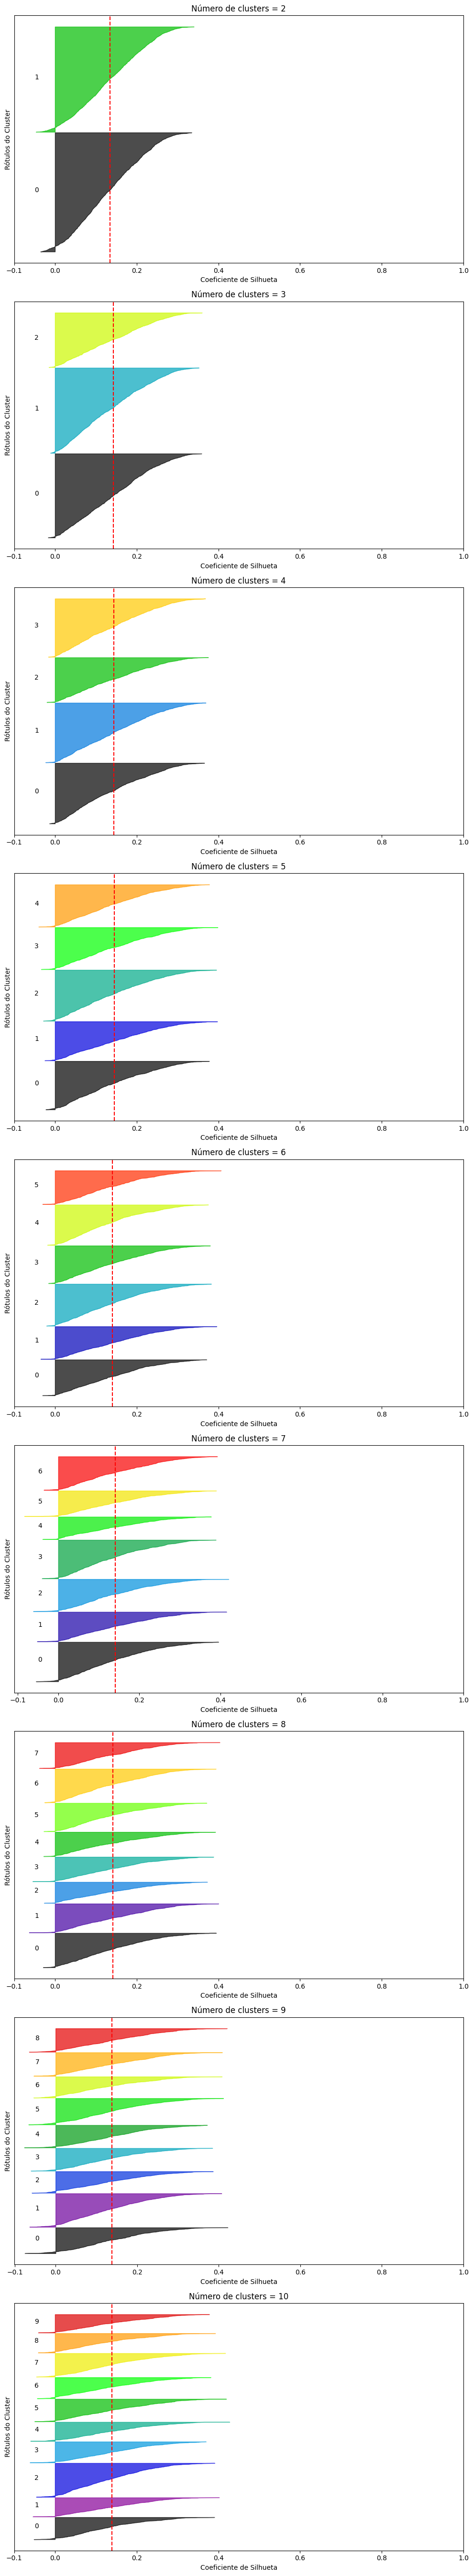

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Definir uma faixa de número de clusters para avaliar
range_n_clusters = range(2, 11)

# Criar subplots para o gráfico de análise de silhueta
fig, ax = plt.subplots(len(range_n_clusters), 1)
fig.set_size_inches(10, 6 * len(range_n_clusters))

for i, n_clusters in enumerate(range_n_clusters):
    # Inicializar o modelo KMeans com o número de clusters atual
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

    # Calcular os coeficientes de silhueta para cada amostra
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    sample_silhouette_values = silhouette_samples(scaled_features, cluster_labels)

    # Ordenar os valores de silhueta para plotagem
    sample_silhouette_values.sort()

    # Plotar os coeficientes de silhueta para cada amostra
    y_lower = 10
    for j in range(n_clusters):
        # Agregar os coeficientes de silhueta para amostras pertencentes ao cluster j e classificar
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        cluster_silhouette_values.sort()

        size_cluster_j = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        ax[i].fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquetas e posição do cluster
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Calcular a nova posição para o próximo gráfico
        y_lower = y_upper + 10

    ax[i].set_title(f"Número de clusters = {n_clusters}")
    ax[i].set_xlabel("Coeficiente de Silhueta")
    ax[i].set_ylabel("Rótulos do Cluster")
    ax[i].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax[i].set_yticks([])  # Limpar os rótulos do eixo y
    ax[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.tight_layout()
plt.show()

In [ ]:

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Exiba os resultados
print(df[['A_id', 'cluster']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        A_id  cluster
0        0.0        0
1        1.0        0
2        2.0        2
3        3.0        2
4        4.0        2
...      ...      ...
3995  3995.0        1
3996  3996.0        2
3997  3997.0        0
3998  3998.0        0
3999  3999.0        2

[4000 rows x 2 columns]


#PCA

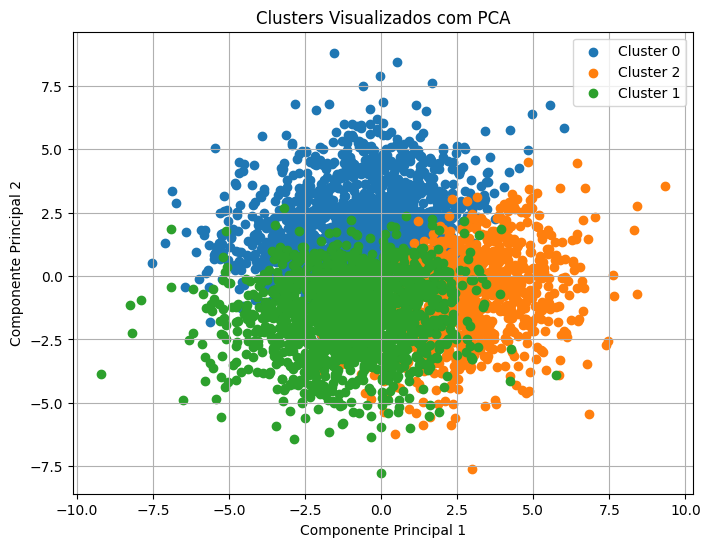

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduza a dimensionalidade dos dados com PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Adicione as colunas PCA aos dados do DataFrame
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

# Visualize os clusters nos componentes principais (PCA)
plt.figure(figsize=(8, 6))

# Plotar os pontos de cada cluster com uma cor diferente
for cluster_id in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_id}')

plt.title('Clusters Visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


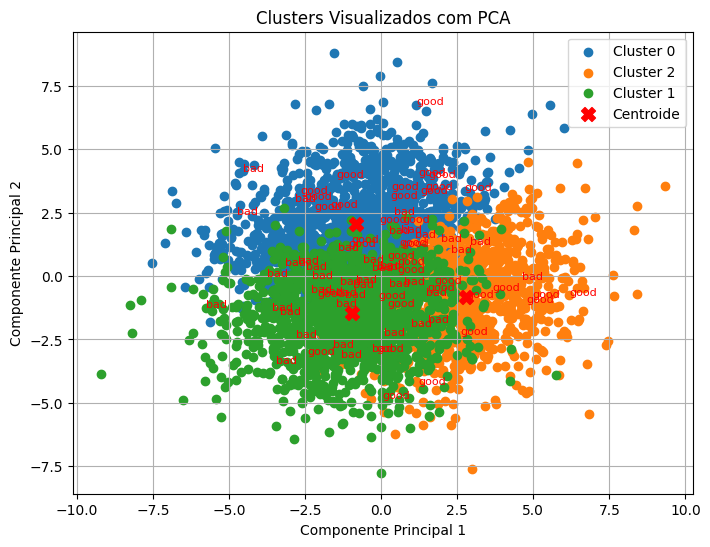

In [ ]:
import matplotlib.pyplot as plt

# Visualize os clusters nos componentes principais (PCA)
plt.figure(figsize=(8, 6))

# Plotar os pontos de cada cluster com uma cor diferente
for cluster_id in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_id}')

# Adicionar os nomes dos rótulos em alguns nós específicos
for i in range(len(df)):
    if i % 50 == 0:  # Adiciona o nome do rótulo a cada 50 pontos (altere conforme necessário)
        plt.text(df.loc[i, 'PCA1'], df.loc[i, 'PCA2'], df.loc[i, 'Quality'], fontsize=8, color='red')

# Calcular os centroides de cada cluster
centroids = []
for cluster_id in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_id]
    centroid = cluster_data[['PCA1', 'PCA2']].mean()
    centroids.append(centroid)

centroids = pd.DataFrame(centroids, columns=['PCA1', 'PCA2'])

# Plotar os centroides de cada cluster
plt.scatter(centroids['PCA1'], centroids['PCA2'], marker='X', color='red', s=100, label='Centroide')

plt.title('Clusters Visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

# t-SNE

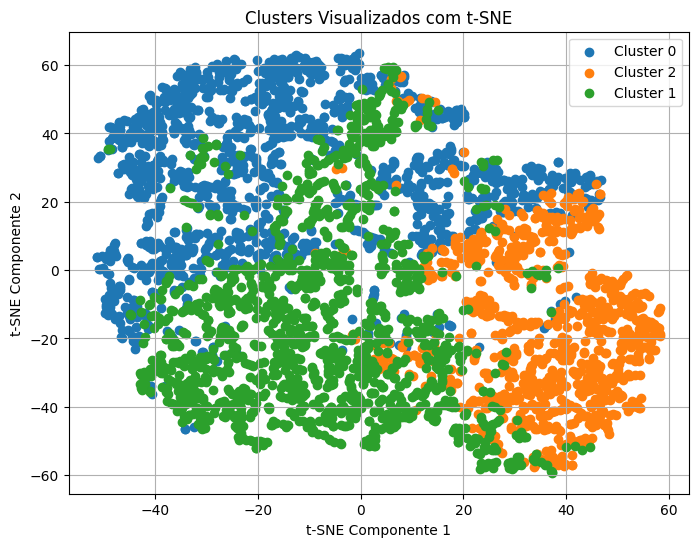

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduza a dimensionalidade dos dados com t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features)

# Adicione as colunas t-SNE aos dados do DataFrame
df['t-SNE1'] = tsne_features[:, 0]
df['t-SNE2'] = tsne_features[:, 1]

# Visualize os clusters no espaço t-SNE
plt.figure(figsize=(8, 6))

# Plotar os pontos de cada cluster com uma cor diferente
for cluster_id in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data['t-SNE1'], cluster_data['t-SNE2'], label=f'Cluster {cluster_id}')

plt.title('Clusters Visualizados com t-SNE')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend()
plt.grid(True)
plt.show()

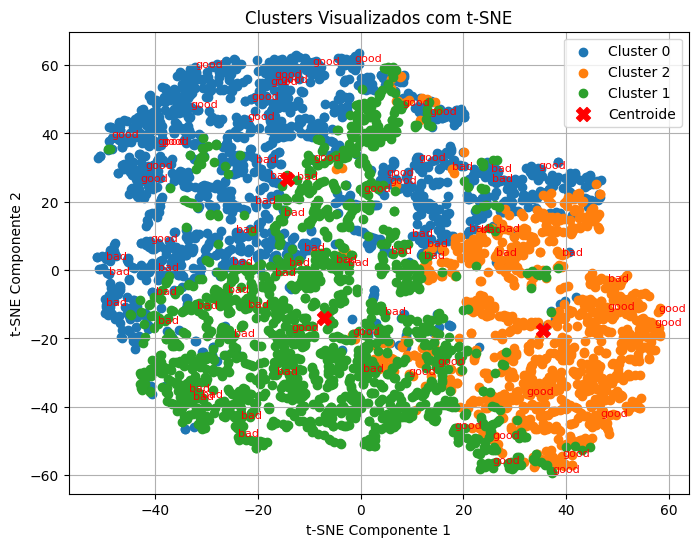

In [ ]:
import matplotlib.pyplot as plt

# Visualize os clusters no espaço t-SNE
plt.figure(figsize=(8, 6))

# Plotar os pontos de cada cluster com uma cor diferente
for cluster_id in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data['t-SNE1'], cluster_data['t-SNE2'], label=f'Cluster {cluster_id}')

# Adicionar os nomes dos rótulos em alguns nós específicos
for i in range(len(df)):
    if i % 50 == 0:  # Adiciona o nome do rótulo a cada 50 pontos (altere conforme necessário)
        plt.text(df.loc[i, 't-SNE1'], df.loc[i, 't-SNE2'], df.loc[i, 'Quality'], fontsize=8, color='red')

# Calcular os centroides de cada cluster
centroids = []
for cluster_id in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_id]
    centroid = cluster_data[['t-SNE1', 't-SNE2']].mean()
    centroids.append(centroid)

centroids = pd.DataFrame(centroids, columns=['t-SNE1', 't-SNE2'])

# Plotar os centroides de cada cluster
plt.scatter(centroids['t-SNE1'], centroids['t-SNE2'], marker='X', color='red', s=100, label='Centroide')

plt.title('Clusters Visualizados com t-SNE')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend()
plt.grid(True)
plt.show()

##Comparando as duas reduções de dimensionalidade

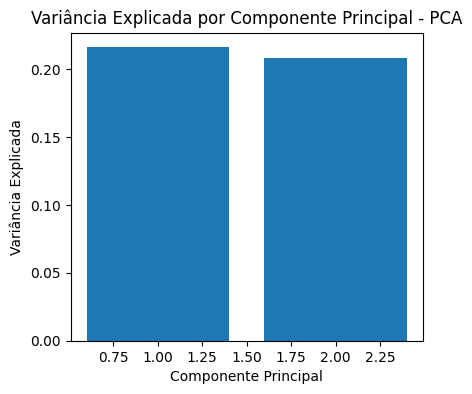

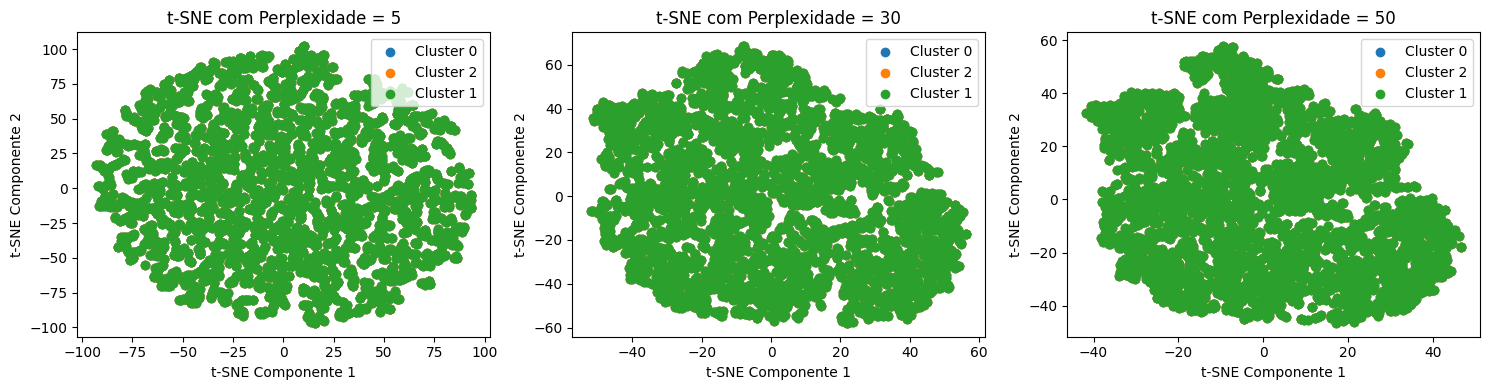

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Variância explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada por Componente Principal - PCA')


# t-SNE
perplexities = [5, 30, 50]  # Diferentes valores de perplexidade para experimentar

plt.figure(figsize=(15, 4))
for i, perplexity in enumerate(perplexities):
    # Redução de dimensionalidade com t-SNE para a perplexidade atual
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_features = tsne.fit_transform(scaled_features)

    # Visualização dos clusters no espaço t-SNE
    plt.subplot(1, len(perplexities), i + 1)
    for cluster_id in df['cluster'].unique():
        cluster_data = df[df['cluster'] == cluster_id]
        plt.scatter(tsne_features[:, 0], tsne_features[:, 1], label=f'Cluster {cluster_id}')
    plt.title(f't-SNE com Perplexidade = {perplexity}')
    plt.xlabel('t-SNE Componente 1')
    plt.ylabel('t-SNE Componente 2')
    plt.legend()
plt.tight_layout()
plt.show()

